# Importing necessary packages

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE
import seaborn as sns

# Loading the data

In [2]:
train = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Data preparation

In [3]:
# Split data
y = train['label']
X = train.drop(['label'], axis=1)

X.shape, y.shape

((27455, 784), (27455,))

# PCA dimensionality reduction

In [4]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X/255)
print('shape of pca_reduced.shape = ', pca_data.shape)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
pca_data = np.vstack((pca_data.T, y)).T
pca_df = pd.DataFrame(pca_data, columns=('PC 1', 'PC 2', 'label'))
pca_df.head()

shape of pca_reduced.shape =  (27455, 2)
Explained variation per principal component: [0.31167222 0.09605894]


,PC 1,PC 2,label
0,0.471095,-1.725966,3.0
1,1.294982,0.182151,6.0
2,-0.218032,-2.652558,2.0
3,-1.130436,-1.736839,2.0
4,-0.952901,-0.247756,13.0


# Visualizing PCA

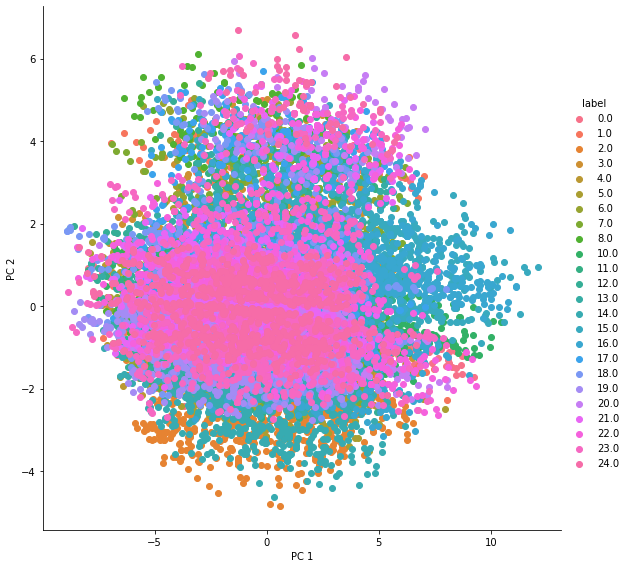

In [5]:
sns.FacetGrid(pca_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()

# t - SNE dimensionality reduction

In [6]:
model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000)
tsne_data = model.fit_transform(X/255)

print('shape of tsne_reduced.shape = ', tsne_data.shape)

tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(tsne_data, columns = ('PC 1', 'PC 2', 'label'))
tsne_df.head()

shape of tsne_reduced.shape =  (27455, 2)


,PC 1,PC 2,label
0,13.334762,25.204010,3.0
1,54.720295,11.304844,6.0
2,-3.767631,81.328857,2.0
3,81.700623,27.949898,2.0
4,-27.858282,37.509563,13.0


# Visualizing t - SNE

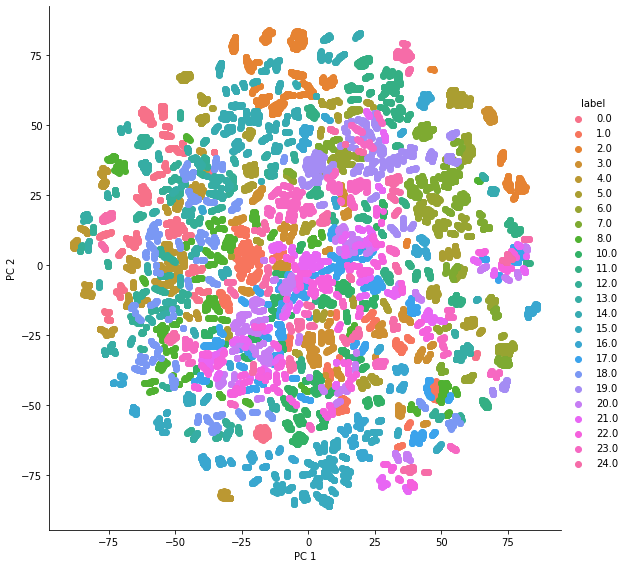

In [7]:
sns.FacetGrid(tsne_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()

# PCA + t-SNE

In [8]:
only_pca_model = decomposition.PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X/255)
only_pca_data = np.vstack((only_pca_data.T, y)).T

pca_tsne_model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000, verbose=1)
pca_tsne_data = model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y)).T
pca_tsne_df = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_df.head()

,PC 1,PC 2,label
0,-4.837883,40.988590,3.0
1,53.181370,40.892944,6.0
2,-7.196511,84.411339,2.0
3,-30.065987,77.603996,2.0
4,-51.408966,0.152056,13.0


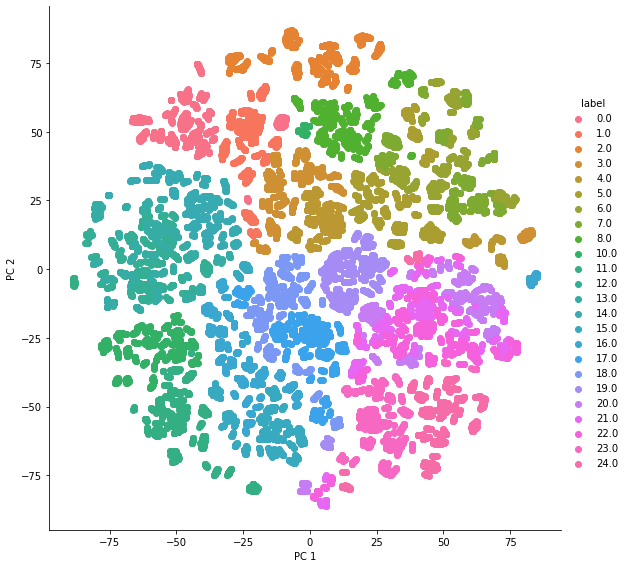

In [9]:
sns.FacetGrid(pca_tsne_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()

# Conclusion:

**We can see that PCA + t - SNE does great job!!**